In [1]:
import sys
try:
    sys.path.remove("\\\\?\\C:\\Users\\andre\\Documents\\tracking_optimizations\\gpu-tracking")
except ValueError:
    pass

import gpu_tracking
import numpy as np
import pickle
import matplotlib.pyplot as plt
import tifffile
import pandas as pd
import trackpy as tp
from skimage.feature.blob import blob_log
import os
from pathlib import Path
import plotly
def load_dump(path):
    type_key = {0: "float32", 1: "uint32", 2: "int32"}
    for curdir, folders, files in os.walk(path):
        dumps = [file for file in files if file.startswith("dump")]
        inds = [int(dump.split(".")[0].replace("dump", "")) for dump in dumps]
        dumps_inds = list(zip(dumps, inds))
        dumps_inds.sort(key = lambda x: x[1])
        datas = []
        for dump, ind in dumps_inds:
            with open(Path(curdir) / f"shape{ind}.dump", "rb") as file:
                shape_type = np.frombuffer(file.read(), dtype = "uint32")
                shape, type = shape_type[:-1], shape_type[-1]
            
            with open(Path(curdir) / dump, "rb") as file:
                data = np.frombuffer(file.read(), dtype = type_key[type])
            datas.append(data[:np.product(shape)].reshape(shape))
        return datas

videasy = gpu_tracking.load("easy_test_data.tif", keys = range(50)).astype("float32")
# vidhard = gpu_tracking.load("hard_test_data.tif", keys = range(50)).astype("float32")

In [2]:
mean_df = gpu_tracking.batch(videasy.mean(axis = 0)[None], 9, snr = 1.5, minmass_snr = 0.3)

In [3]:
mean_df.drop(columns = "frame")

y           x         mass
0   372.382812  312.720306   277.688019
1   219.425095  280.696472  1149.910889
2   341.619141  352.355255   515.143372
3   111.294548  333.966125   830.705200
4   372.638611  364.824402   189.526962
5   347.024323  330.762848   318.710205
6   163.533096  345.779388  1994.629517
7   131.048309  394.531738  1046.949829
8   339.366394  373.872650   565.350342
9   191.104202  345.117859  1454.166748
10   81.434601  408.394348   963.757812
11  498.708374  386.654999   472.186707
12  408.977295  410.123077   674.298645
13  440.313141  446.817108   377.125671
14  117.912453  417.836670   850.294739
15   24.422003  426.927704   262.687683
16  171.494476  465.420258   298.872864
17  427.971466  446.876190   834.306824
18  239.681503  472.611755   500.304657
19  467.760468  489.189423   323.885498
20  420.019165  505.823364   767.778198
21  307.171265  500.688965   202.153488
22  374.602081   19.484447   767.903564
23  486.055450   41.041504   317.893890
24  295.172852   26.111954   651.852295
25  165.205414  102.686874   435.947571
26  477.138519   52.093899   276.089142
27  242.415085   45.764465   892.188538
28  172.211380  119.460854   458.198181
29  144.562286  108.104813   612.562317
30  417.542023   67.846161   415.736145
31  136.981903  117.053810   335.479706
32  329.243439   50.189583   387.906250
33   42.652153  102.930435   257.375793
34  137.600082  153.242752   493.844727
35  252.422409   80.916672   525.519409
36  122.720711  215.007385   328.148193
37  188.857315  177.301270   992.035828
38  380.820160  161.666336  2423.850342
39  232.799255  139.191589   704.463196
40   58.270061  194.317810   218.357788
41  181.869629  142.409302   856.703857
42   56.868393  208.357269   776.123535
43  350.686096  249.011261   267.366791
44  125.770874  269.379150   273.061676
45  479.421631  300.166321  1271.990723
46  358.709717  258.125244   476.659790
47  321.431915  294.669128   675.102234
48  115.898285  253.511154   416.311737
49  496.346100  267.154510  1035.086060
50   92.286880  333.483368   386.296265
51  389.482758  327.698059   920.584839

In [24]:
test = gpu_tracking.batch(videasy, 9, points_to_characterize = mean_df.drop(columns = "frame"), characterize = True)

In [25]:
it = iter(test.groupby("frame"))
first, second = next(it)[1], next(it)[1]
first

frame           y           x  mass   Rg  raw  signal  ecc
0       0  372.382812  312.720306   0.0  0.0  0.0     0.0  0.0
1       0  219.425095  280.696472   0.0  0.0  0.0     0.0  0.0
2       0  341.619141  352.355255   0.0  0.0  0.0     0.0  0.0
3       0  111.294548  333.966125   0.0  0.0  0.0     0.0  0.0
4       0  372.638611  364.824402   0.0  0.0  0.0     0.0  0.0
5       0  347.024323  330.762848   0.0  0.0  0.0     0.0  0.0
6       0  163.533096  345.779388   0.0  0.0  0.0     0.0  0.0
7       0  131.048309  394.531738   0.0  0.0  0.0     0.0  0.0
8       0  339.366394  373.872650   0.0  0.0  0.0     0.0  0.0
9       0  191.104202  345.117859   0.0  0.0  0.0     0.0  0.0
10      0   81.434601  408.394348   0.0  0.0  0.0     0.0  0.0
11      0  498.708374  386.654999   0.0  0.0  0.0     0.0  0.0
12      0  408.977295  410.123077   0.0  0.0  0.0     0.0  0.0
13      0  440.313141  446.817108   0.0  0.0  0.0     0.0  0.0
14      0  117.912453  417.836670   0.0  0.0  0.0     0.0  0.0
15      0   24.422003  426.927704   0.0  0.0  0.0     0.0  0.0
16      0  171.494476  465.420258   0.0  0.0  0.0     0.0  0.0
17      0  427.971466  446.876190   0.0  0.0  0.0     0.0  0.0
18      0  239.681503  472.611755   0.0  0.0  0.0     0.0  0.0
19      0  467.760468  489.189423   0.0  0.0  0.0     0.0  0.0
20      0  420.019165  505.823364   0.0  0.0  0.0     0.0  0.0
21      0  307.171265  500.688965   0.0  0.0  0.0     0.0  0.0
22      0  374.602081   19.484447   0.0  0.0  0.0     0.0  0.0
23      0  486.055450   41.041504   0.0  0.0  0.0     0.0  0.0
24      0  295.172852   26.111954   0.0  0.0  0.0     0.0  0.0
25      0  165.205414  102.686874   0.0  0.0  0.0     0.0  0.0
26      0  477.138519   52.093899   0.0  0.0  0.0     0.0  0.0
27      0  242.415085   45.764465   0.0  0.0  0.0     0.0  0.0
28      0  172.211380  119.460854   0.0  0.0  0.0     0.0  0.0
29      0  144.562286  108.104813   0.0  0.0  0.0     0.0  0.0
30      0  417.542023   67.846161   0.0  0.0  0.0     0.0  0.0
31      0  136.981903  117.053810   0.0  0.0  0.0     0.0  0.0
32      0  329.243439   50.189583   0.0  0.0  0.0     0.0  0.0
33      0   42.652153  102.930435   0.0  0.0  0.0     0.0  0.0
34      0  137.600082  153.242752   0.0  0.0  0.0     0.0  0.0
35      0  252.422409   80.916672   0.0  0.0  0.0     0.0  0.0
36      0  122.720711  215.007385   0.0  0.0  0.0     0.0  0.0
37      0  188.857315  177.301270   0.0  0.0  0.0     0.0  0.0
38      0  380.820160  161.666336   0.0  0.0  0.0     0.0  0.0
39      0  232.799255  139.191589   0.0  0.0  0.0     0.0  0.0
40      0   58.270061  194.317810   0.0  0.0  0.0     0.0  0.0
41      0  181.869629  142.409302   0.0  0.0  0.0     0.0  0.0
42      0   56.868393  208.357269   0.0  0.0  0.0     0.0  0.0
43      0  350.686096  249.011261   0.0  0.0  0.0     0.0  0.0
44      0  125.770874  269.379150   0.0  0.0  0.0     0.0  0.0
45      0  479.421631  300.166321   0.0  0.0  0.0     0.0  0.0
46      0  358.709717  258.125244   0.0  0.0  0.0     0.0  0.0
47      0  321.431915  294.669128   0.0  0.0  0.0     0.0  0.0
48      0  115.898285  253.511154   0.0  0.0  0.0     0.0  0.0
49      0  496.346100  267.154510   0.0  0.0  0.0     0.0  0.0
50      0   92.286880  333.483368   0.0  0.0  0.0     0.0  0.0
51      0  389.482758  327.698059   0.0  0.0  0.0     0.0  0.0

In [20]:
second

frame           y           x  mass   Rg  raw  signal  ecc
52       1  372.382812  312.720306   0.0  0.0  0.0     0.0  0.0
53       1  219.425095  280.696472   0.0  0.0  0.0     0.0  0.0
54       1  341.619141  352.355255   0.0  0.0  0.0     0.0  0.0
55       1  111.294548  333.966125   0.0  0.0  0.0     0.0  0.0
56       1  372.638611  364.824402   0.0  0.0  0.0     0.0  0.0
57       1  347.024323  330.762848   0.0  0.0  0.0     0.0  0.0
58       1  163.533096  345.779388   0.0  0.0  0.0     0.0  0.0
59       1  131.048309  394.531738   0.0  0.0  0.0     0.0  0.0
60       1  339.366394  373.872650   0.0  0.0  0.0     0.0  0.0
61       1  191.104202  345.117859   0.0  0.0  0.0     0.0  0.0
62       1   81.434601  408.394348   0.0  0.0  0.0     0.0  0.0
63       1  498.708374  386.654999   0.0  0.0  0.0     0.0  0.0
64       1  408.977295  410.123077   0.0  0.0  0.0     0.0  0.0
65       1  440.313141  446.817108   0.0  0.0  0.0     0.0  0.0
66       1  117.912453  417.836670   0.0  0.0  0.0     0.0  0.0
67       1   24.422003  426.927704   0.0  0.0  0.0     0.0  0.0
68       1  171.494476  465.420258   0.0  0.0  0.0     0.0  0.0
69       1  427.971466  446.876190   0.0  0.0  0.0     0.0  0.0
70       1  239.681503  472.611755   0.0  0.0  0.0     0.0  0.0
71       1  467.760468  489.189423   0.0  0.0  0.0     0.0  0.0
72       1  420.019165  505.823364   0.0  0.0  0.0     0.0  0.0
73       1  307.171265  500.688965   0.0  0.0  0.0     0.0  0.0
74       1  374.602081   19.484447   0.0  0.0  0.0     0.0  0.0
75       1  486.055450   41.041504   0.0  0.0  0.0     0.0  0.0
76       1  295.172852   26.111954   0.0  0.0  0.0     0.0  0.0
77       1  165.205414  102.686874   0.0  0.0  0.0     0.0  0.0
78       1  477.138519   52.093899   0.0  0.0  0.0     0.0  0.0
79       1  242.415085   45.764465   0.0  0.0  0.0     0.0  0.0
80       1  172.211380  119.460854   0.0  0.0  0.0     0.0  0.0
81       1  144.562286  108.104813   0.0  0.0  0.0     0.0  0.0
82       1  417.542023   67.846161   0.0  0.0  0.0     0.0  0.0
83       1  136.981903  117.053810   0.0  0.0  0.0     0.0  0.0
84       1  329.243439   50.189583   0.0  0.0  0.0     0.0  0.0
85       1   42.652153  102.930435   0.0  0.0  0.0     0.0  0.0
86       1  137.600082  153.242752   0.0  0.0  0.0     0.0  0.0
87       1  252.422409   80.916672   0.0  0.0  0.0     0.0  0.0
88       1  122.720711  215.007385   0.0  0.0  0.0     0.0  0.0
89       1  188.857315  177.301270   0.0  0.0  0.0     0.0  0.0
90       1  380.820160  161.666336   0.0  0.0  0.0     0.0  0.0
91       1  232.799255  139.191589   0.0  0.0  0.0     0.0  0.0
92       1   58.270061  194.317810   0.0  0.0  0.0     0.0  0.0
93       1  181.869629  142.409302   0.0  0.0  0.0     0.0  0.0
94       1   56.868393  208.357269   0.0  0.0  0.0     0.0  0.0
95       1  350.686096  249.011261   0.0  0.0  0.0     0.0  0.0
96       1  125.770874  269.379150   0.0  0.0  0.0     0.0  0.0
97       1  479.421631  300.166321   0.0  0.0  0.0     0.0  0.0
98       1  358.709717  258.125244   0.0  0.0  0.0     0.0  0.0
99       1  321.431915  294.669128   0.0  0.0  0.0     0.0  0.0
100      1  115.898285  253.511154   0.0  0.0  0.0     0.0  0.0
101      1  496.346100  267.154510   0.0  0.0  0.0     0.0  0.0
102      1   92.286880  333.483368   0.0  0.0  0.0     0.0  0.0
103      1  389.482758  327.698059   0.0  0.0  0.0     0.0  0.0

In [1]:
import lib

In [22]:
app.app.run_server()

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app 'gpu_tracking.app'
 * Debug mode: off


In [18]:
idk = gpu_tracking.mean_from_disk(r"C:\Users\andre\Documents\tracking_optimizations\gpu-tracking\testing\grey_lion.tiff")

In [3]:
idk1 = gpu_tracking.mean_from_disk(r"C:\Users\andre\Documents\tracking_optimizations\gpu-tracking\tiff_vsi\vsi dummy\_Process_9747_\stack1\frame_t_0.ets")

In [12]:
gpu_tracking.mean_from_disk(r"C:\Users\andre\Documents\tracking_optimizations\gpu-tracking\testing\easy_test_data.tif")

array([[2141.9631, 2152.038 , 2143.7375, ..., 2127.334 , 2131.0789,
        2123.2368],
       [2142.5442, 2144.5686, 2145.9895, ..., 2133.0518, 2134.7644,
        2129.7058],
       [2142.6685, 2154.6772, 2146.4092, ..., 2132.7378, 2137.8162,
        2128.9824],
       ...,
       [2099.656 , 2111.2712, 2101.7795, ..., 2079.433 , 2080.442 ,
        2075.8755],
       [2101.568 , 2111.0603, 2102.5818, ..., 2078.1665, 2082.7258,
        2074.9233],
       [2101.3843, 2112.0542, 2103.436 , ..., 2079.6086, 2084.4224,
        2076.7454]], dtype=float32)

In [4]:
idk2 = gpu_tracking.load(r"C:\Users\andre\Documents\tracking_optimizations\gpu-tracking\tiff_vsi\vsi dummy\_Process_9747_\stack1\frame_t_0.ets")

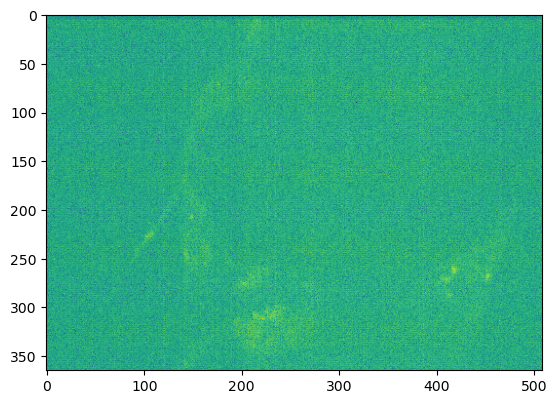

In [5]:
plt.imshow(idk1)

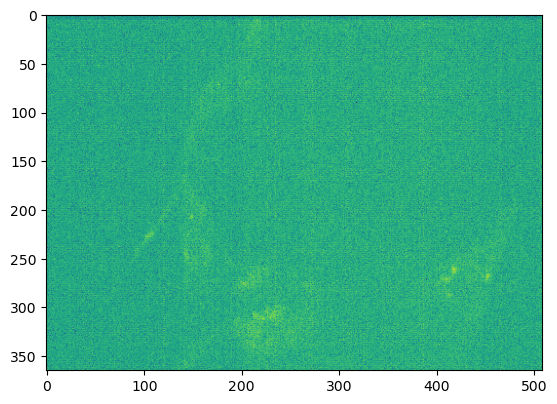

In [6]:
plt.imshow(idk2.mean(axis = 0))

In [13]:
idk2.mean(axis = 0).shape

(509, 365)

In [9]:
np.abs(idk1 - idk2.mean(axis = 0)).sum()

0.35399151610917556

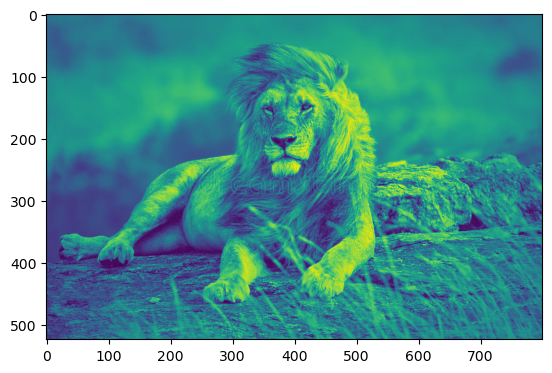

In [7]:
plt.imshow(idk1)

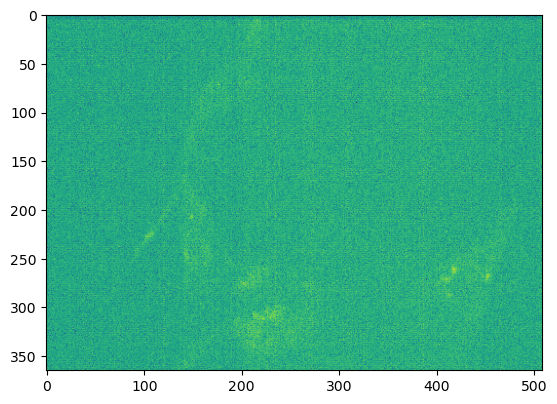

In [8]:
plt.imshow(idk2.mean(axis = 0))

In [5]:
idk2.mean(axis = 0).shape

(365, 509)

In [2]:
def annotate_image_plotly(image, tracked_df, figax = None, r = None, frame = None, imshow_kw = {}, circle_kw = {}, subplot_kw = {}):
    from plotly import express as px

    if frame is not None:
        subset_df = tracked_df[tracked_df["frame"] == frame]
    else:
        subset_df = tracked_df
    
    if r is None and "r" not in subset_df:
        r = 5
        print(f"Using default r of {r}")
    fig = px.imshow(image, color_continuous_scale = "viridis", **imshow_kw)

    for _idx, row in subset_df.iterrows():
        if r is None:
            inner_r = row["r"]
        else:
            inner_r = r
        x, y = row["x"], row["y"]
        fig.add_shape(
            type = "circle", xref = "x", yref = "y",
            x0 = x - inner_r, y0 = y - inner_r,
            x1 = x + inner_r, y1 = y + inner_r,
            line_color = "black", line_width = 1,
        )
    return fig


In [14]:
df = gpu_tracking.LoG(videasy, min_r = 2.3, max_r = 3.5, characterize = True, snr = 1.5, minmass_snr = 0.3, doughnut_correction = True, overlap_threshold = 0, search_range = 9)
# df = gpu_tracking.batch(videasy, 9, characterize = True, snr = 1.5, minmass_snr = 0.3, doughnut_correction = True)

In [30]:
gpu_tracking.batch_file(
    r'C:\Users\andre\Documents\tracking_optimizations\gpu-tracking\testing\easy_test_data.tif',
    7,
    characterize = True,
    doughnut_correction = True,
    snr = 1.5,
    minmass_snr = 0.3,
)

frame           y           x         mass   Rg     raw      signal  \
0           0  300.922028   20.108877   600.679626  0.0  2387.0   93.733238   
1           0  242.298233   45.790340   725.764893  0.0  2618.0  112.384674   
2           0  332.029510   47.797188   804.221619  0.0  2282.0   91.633911   
3           0  476.207001   50.888527   729.139404  0.0  2299.0   96.174576   
4           0  167.148117  101.786980   842.013489  0.0  2365.0   98.525764   
...       ...         ...         ...          ...  ...     ...         ...   
192117   4999  204.998764  456.168671  1099.776123  0.0  2911.0  153.892914   
192118   4999   37.787804  441.764801   690.084229  0.0  2126.0   96.984818   
192119   4999  402.694733  454.888672  2603.590088  0.0  2572.0  287.788727   
192120   4999  215.242386  483.592255  1137.138306  0.0  2580.0  146.068344   
192121   4999  472.559357  472.613037  1407.453491  0.0  2782.0  169.264816   

             ecc  raw_mass  raw_bg_median  raw_mass_corrected  
0       0.184898   79820.0         2116.0              1528.0  
1       0.183222   79990.0         2112.0              1846.0  
2       0.128593   80015.0         2105.0              2130.0  
3       0.151943   79555.0         2103.0              1744.0  
4       0.132518   80614.0         2105.0              2729.0  
...          ...       ...            ...                 ...  
192117  0.162698   82086.0         2105.0              4201.0  
192118  0.163522   78959.0         2089.0              1666.0  
192119  0.124272   86180.0         2112.0              8036.0  
192120  0.147384   81068.0         2110.0              2998.0  
192121  0.136704   82299.0         2104.0              4451.0  

[192122 rows x 11 columns]

In [ ]:
gpu_tracking.batch_file(
    r'C:\Users\andre\Documents\tracking_optimizations\gpu-tracking\testing\easy_test_data.tif',
    7,
    filter_close = True,
    characterize = True,
    doughnut_correction = True,
    snr = 1.5,
    minmass_snr = 0.3,
    truncate_preprocessed = True,
)

In [5]:
gpu_tracking.LoG(
    videasy,
    2.2,
    3.5,
    log_spacing = True,
    overlap_threshold = 0,
    characterize = True,
    doughnut_correction = True,
    snr = 1.5,
    minmass_snr = 0.3,
    # truncate_preprocessed = False,
).r.unique()

array([2.21628397e-05])

In [6]:
np.log(2.2) / np.log(10)

0.3424226808222062

In [ ]:
gpu_tracking.LoG_file(
    r'C:\Users\andre\Documents\tracking_optimizations\gpu-tracking\testing\easy_test_data.tif',
    2.2,
    3.5,
    log_spacing = True,
    overlap_threshold = 0,
    characterize = True,
    doughnut_correction = True,
    snr = 1.5,
    minmass_snr = 0.3,
    truncate_preprocessed = True,
)

In [15]:
test = annotate_image_plotly(videasy[3], df[df["frame"] == 3])

test

In [21]:
idk = gpu_tracking.batch_file(r'C:\Users\andre\Documents\tracking_optimizations\gpu-tracking\testing\easy_test_data.tif', 7, snr = 1.8, minmass_snr = 0.3, characterize = True)

frame           y           x         mass   Rg     raw      signal  \
0           0  242.298233   45.790340   725.764893  0.0  2618.0  112.384674   
1           0  150.803848  132.437988  1044.031982  0.0  2722.0  130.168686   
2           0  167.148117  101.786980   842.013489  0.0  2365.0   98.525764   
3           0  188.364120  178.291046   897.141296  0.0  2280.0  124.770012   
4           0  245.437622  183.499985  1221.004639  0.0  2532.0  149.787262   
...       ...         ...         ...          ...  ...     ...         ...   
140982   4999  289.274078  425.603973  1830.496460  0.0  2558.0  202.690323   
140983   4999  204.998764  456.168671  1099.776123  0.0  2911.0  153.892914   
140984   4999  402.694733  454.888672  2603.590088  0.0  2572.0  287.788727   
140985   4999  215.242386  483.592255  1137.138306  0.0  2580.0  146.068344   
140986   4999  472.559357  472.613037  1407.453491  0.0  2782.0  169.264816   

             ecc  
0       0.183222  
1       0.142438  
2       0.132518  
3       0.161542  
4       0.139829  
...          ...  
140982  0.124517  
140983  0.162698  
140984  0.124272  
140985  0.147384  
140986  0.136704  

[140987 rows x 8 columns]

In [28]:
idk.columns.drop("frame")

Index(['y', 'x', 'mass', 'Rg', 'raw', 'signal', 'ecc'], dtype='object')

In [25]:
idk.Rg.any()

False

In [26]:
["312", 2]

['312', 2]

In [6]:
gpu_tracking.LoG_file(
    r'C:\Users\andre\Documents\tracking_optimizations\gpu-tracking\testing\easy_test_data.tif',
    2.2,
    3.5,
    n_radii = 10,
    overlap_threshold = 0,
    snr = 1.5,
    minmass_snr = 0.3,
)

frame           y           x         mass         r
0           0  150.630432  132.723267  1374.221558  2.200000
1           0  292.140320  175.561142   622.914429  2.200000
2           0    7.930180  262.762299   579.331177  2.200000
3           0  498.548767  387.070343  1514.719238  2.200000
4           0  245.360855  183.466156  1697.813232  2.344445
...       ...         ...         ...          ...       ...
250931   4999  216.849014  314.079224  1946.677856  3.500000
250932   4999  346.373535  405.086823  1581.256470  3.500000
250933   4999  402.768585  454.957428  3783.926025  3.500000
250934   4999  308.993622  351.022827  2518.569580  3.500000
250935   4999  205.006546  456.187653  1587.549927  3.500000

[250936 rows x 5 columns]

In [20]:
test.add_shape()

(Heatmap({
     'coloraxis': 'coloraxis',
     'hovertemplate': 'x: %{x}<br>y: %{y}<br>color: %{z}<extra></extra>',
     'name': '0',
     'xaxis': 'x',
     'yaxis': 'y',
     'z': array([[2175., 2230., 2182., ..., 2086., 2028., 2129.],
                 [2175., 2080., 2124., ..., 2115., 2085., 2091.],
                 [2150., 2161., 2128., ..., 2145., 2285., 2086.],
                 ...,
                 [2073., 2099., 2103., ..., 2043., 2068., 2071.],
                 [2093., 2074., 2144., ..., 2181., 2067., 2028.],
                 [2058., 2099., 2193., ..., 2087., 2112., 2175.]], dtype=float32)
 }),)

In [5]:
from scipy.stats import linregress

In [6]:
linregress(test["mass"], test["raw_mass_corrected"])

LinregressResult(slope=1.8518216907028031, intercept=66.4526123746582, rvalue=0.9711168985234514, pvalue=0.0, stderr=0.0003740110542536839, intercept_stderr=0.643344448572456)

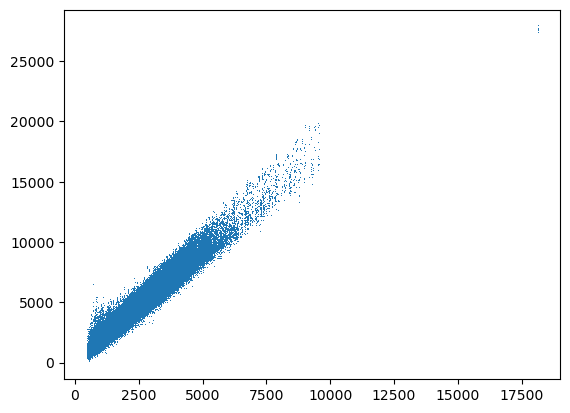

In [4]:
plt.plot(test["mass"], test["raw_mass_corrected"], ",")

In [3]:
test

frame           y           x        mass   Rg  raw  signal  ecc
0            0  338.039734  412.447113  512.551697  0.0  0.0     0.0  0.0
1            0    7.807298  421.962219  461.556519  0.0  0.0     0.0  0.0
2            0   24.661442  427.522095  496.552979  0.0  0.0     0.0  0.0
3            0  483.400818  414.737122  737.118347  0.0  0.0     0.0  0.0
4            0  466.133881  413.210663  478.310455  0.0  0.0     0.0  0.0
...        ...         ...         ...         ...  ...  ...     ...  ...
4606546   4999  409.988068    8.667610  360.018005  0.0  0.0     0.0  0.0
4606547   4999  390.434418   45.163578  363.665924  0.0  0.0     0.0  0.0
4606548   4999   27.251766   30.589226  599.532288  0.0  0.0     0.0  0.0
4606549   4999  281.589935   33.476799  285.109497  0.0  0.0     0.0  0.0
4606550   4999  114.865921   16.604109  317.747833  0.0  0.0     0.0  0.0

[4606551 rows x 8 columns]

In [96]:
background, results, particles, particles2, std, atomic, atomic2, atomic_filtered, dispatcher1, dispatcher2, counter = load_dump("mean_pic")
std, atomic, atomic2, atomic_filtered, dispatcher1, dispatcher2, counter
# for x in (background, results, temp, particles, std, atomic, atomic2, atomic_filtered, dispatcher1, dispatcher2):
#     print(x)

(array([53.44981], dtype=float32),
 array([403], dtype=uint32),
 array([403], dtype=uint32),
 array([32], dtype=uint32),
 array([2], dtype=uint32),
 array([0], dtype=uint32),
 array([261216], dtype=uint32))

In [98]:
pd.DataFrame(particles2)

0           1           2    3          4    5    6    7    8  \
0      125.452797  348.175507  307.739410  0.0  36.230736  0.0  0.0  0.0  0.0   
1      203.598038  347.640961  250.198151  0.0  52.478386  0.0  0.0  0.0  0.0   
2       82.595299  356.257172  370.083893  0.0  70.180428  0.0  0.0  0.0  0.0   
3      320.518219  353.938934  430.596527  0.0  60.209888  0.0  0.0  0.0  0.0   
4      241.083023  339.536316  375.631409  0.0  49.281387  0.0  0.0  0.0  0.0   
...           ...         ...         ...  ...        ...  ...  ...  ...  ...   
26209    0.000000    0.000000    0.000000  0.0   0.000000  0.0  0.0  0.0  0.0   
26210    0.000000    0.000000    0.000000  0.0   0.000000  0.0  0.0  0.0  0.0   
26211    0.000000    0.000000    0.000000  0.0   0.000000  0.0  0.0  0.0  0.0   
26212    0.000000    0.000000    0.000000  0.0   0.000000  0.0  0.0  0.0  0.0   
26213    0.000000    0.000000    0.000000  0.0   0.000000  0.0  0.0  0.0  0.0   

          9  
0      29.0  
1      29.0  
2      29.0  
3      29.0  
4      29.0  
...     ...  
26209   0.0  
26210   0.0  
26211   0.0  
26212   0.0  
26213   0.0  

[26214 rows x 10 columns]

In [80]:
512**2 - 261274

870

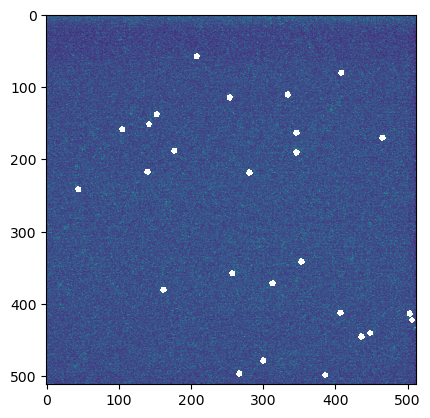

In [26]:
plt.imshow(background)

In [24]:
1158123520 / 2**32

0.26964664459228516

In [16]:
atomic_filtered

array([30], dtype=uint32)

In [17]:
atomic2

array([416], dtype=uint32)

In [18]:
atomic

array([417], dtype=uint32)

In [2]:
s, full = load_dump("mean_pic")

ValueError: too many values to unpack (expected 2)

In [ ]:
s

In [265]:
videasy[0].std(ddof = 1)

54.013348

In [263]:
s[0]

54.01335

In [252]:
full[:512**2//8**2].sum()

553436000.0

In [234]:
full[:100]

array([8655355., 8667962., 8669635., 8668190., 8659048., 8660917.,
       8666221., 8682975., 1079952., 1082830., 1084781., 1083036.,
       1082454., 1081256., 1080342., 1088282., 1083628., 1085456.,
       1084932., 1082104., 1082408., 1085782., 1084053., 1085116.,
       1082323., 1081496., 1083741., 1083564., 1084878., 1083653.,
       1084208., 1083517., 1083172., 1082702., 1084607., 1085095.,
       1080538., 1082902., 1087690., 1083889., 1083014., 1085359.,
       1083552., 1084004., 1081655., 1078778., 1083035., 1083751.,
       1079868., 1084995., 1081835., 1084229., 1082485., 1084840.,
       1083801., 1083264., 1079861., 1083931., 1081178., 1082114.,
       1080606., 1083837., 1082456., 1087702.,  134629.,  135256.,
        134720.,  135464.,  135059.,  135274.,  135333.,  135963.,
        134760.,  135109.,  134779.,  134579.,  135018.,  135088.,
        135082.,  137406.,  135461.,  135060.,  135532.,  135434.,
        135642.,  135871.,  134706.,  135128.,  134977.,  1348

In [232]:
full[:8].sum() - videasy[0].sum()

-484056640.0

In [216]:
(full != 0).sum()

32768

In [217]:
full.sum()

553386900.0

In [203]:
np.float32(videasy[0].sum()) 

553386940.0

dtype('float32')

In [161]:
full.flat[: 200]

array([69071152., 69187648., 69181488., 69224936., 69160736., 69217168.,
       69173080., 69260656.,  8627945.,  8643572.,  8647349.,  8654678.,
        8650410.,  8652923.,  8636613.,  8659465.,  8630201.,  8651378.,
        8652262.,  8643442.,  8643349.,  8650581.,  8642987.,  8665711.,
        8641295.,  8643688.,  8650372.,  8653192.,  8642439.,  8658638.,
        8656215.,  8665775.,  8649043.,  8653686.,  8649861.,  8658301.,
        8637614.,  8654622.,  8648363.,  8646153.,  8629606.,  8650806.,
        8643129.,  8652963.,  8646061.,  8651545.,  8651749.,  8649908.,
        8628302.,  8653528.,  8645085.,  8646711.,  8645790.,  8653079.,
        8653093.,  8663133.,  8637604.,  8646928.,  8642704.,  8647342.,
        8644676.,  8666135.,  8643888.,  8664612.,  1076919.,  1079130.,
        1077166.,  1081828.,  1078563.,  1078409.,  1080880.,  1080987.,
        1077166.,  1078379.,  1078467.,  1078986.,  1081693.,  1078905.,
        1077466.,  1082740.,  1076823.,  1079525., 

In [181]:
sum([69071152., 69187648., 69181488., 69224936., 69160736., 69217168.,
       69173080., 69260656.])

553476864.0

In [184]:
s[0] == 553476864.0

True

In [190]:
videasy[0].sum()

553386940.0

In [185]:
s[0]

553476860.0

In [177]:
idk = np.abs((s[0] - videasy[0].sum()) - full.flat)

In [179]:
idk.sort()
idk[::1]

array([4.3040000e+04, 4.3179000e+04, 4.3187000e+04, ..., 6.9127248e+07,
       6.9135016e+07, 6.9170736e+07], dtype=float32)

In [142]:
std

array([53.349724], dtype=float32)

In [139]:
atomic_filtered

array([25], dtype=uint32)

In [135]:
background

array([[2175., 2230., 2182., ..., 2086., 2028., 2129.],
       [2175., 2080., 2124., ..., 2115., 2085., 2091.],
       [2150., 2161., 2128., ..., 2145., 2285., 2086.],
       ...,
       [2073., 2099., 2103., ..., 2043., 2068., 2071.],
       [2093., 2074., 2144., ..., 2181., 2067., 2028.],
       [2058., 2099., 2193., ..., 2087., 2112., 2175.]], dtype=float32)

In [143]:
np.nanstd(background, ddof = 1)

53.490234

In [137]:
std

array([53.490227], dtype=float32)

In [128]:
videasy[0].std(ddof = 1)

54.013348

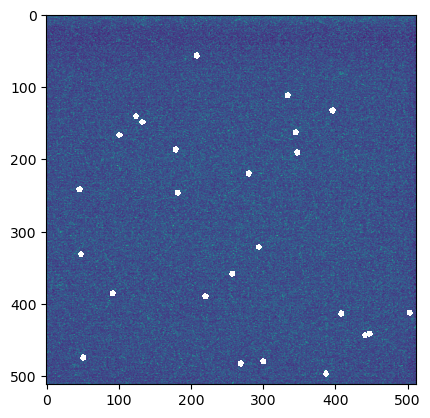

In [121]:
plt.imshow(background)

In [100]:
pd.DataFrame(results)[:20]

0      1            2    3    4    5    6    7    8     9
0   469.916199  500.0     0.000000  0.0  0.0  0.0  0.0  0.0  0.0   0.0
1    54.013351   29.0   769.985596  0.0  0.0  0.0  0.0  0.0  0.0  29.0
2    54.013351   29.0   753.873840  0.0  0.0  0.0  0.0  0.0  0.0  29.0
3    54.013351   29.0   795.962036  0.0  0.0  0.0  0.0  0.0  0.0  29.0
4    54.013351   29.0   600.233398  0.0  0.0  0.0  0.0  0.0  0.0  29.0
5    54.013351   29.0   593.330566  0.0  0.0  0.0  0.0  0.0  0.0  29.0
6    54.013351   29.0   577.444824  0.0  0.0  0.0  0.0  0.0  0.0  29.0
7    54.013351   29.0   586.546753  0.0  0.0  0.0  0.0  0.0  0.0  29.0
8    54.013351   29.0   610.065063  0.0  0.0  0.0  0.0  0.0  0.0  29.0
9    54.013351   29.0   708.938110  0.0  0.0  0.0  0.0  0.0  0.0  29.0
10   54.013351   29.0   656.652588  0.0  0.0  0.0  0.0  0.0  0.0  29.0
11   54.013351   29.0   777.107361  0.0  0.0  0.0  0.0  0.0  0.0  29.0
12   54.013351   29.0   724.421692  0.0  0.0  0.0  0.0  0.0  0.0  29.0
13   54.013351   29.0  1117.893433  0.0  0.0  0.0  0.0  0.0  0.0  29.0
14   54.013351   29.0   525.156677  0.0  0.0  0.0  0.0  0.0  0.0  29.0
15   54.013351   29.0   959.803528  0.0  0.0  0.0  0.0  0.0  0.0  29.0
16   54.013351   29.0   801.129883  0.0  0.0  0.0  0.0  0.0  0.0  29.0
17   54.013351   29.0   946.546021  0.0  0.0  0.0  0.0  0.0  0.0  29.0
18   54.013351   29.0  1518.154419  0.0  0.0  0.0  0.0  0.0  0.0  29.0
19   54.013351   29.0   691.081543  0.0  0.0  0.0  0.0  0.0  0.0  29.0

In [97]:
pd.DataFrame(temp)[:20]

0           1           2    3    4    5    6    7    8     9
0   132.721466  396.060944  735.966980  0.0  0.0  0.0  0.0  0.0  0.0  29.0
1   413.622009  407.896851  769.985596  0.0  0.0  0.0  0.0  0.0  0.0  29.0
2   181.439957  427.325592  417.921600  0.0  0.0  0.0  0.0  0.0  0.0  29.0
3   443.628845  441.211243  753.873840  0.0  0.0  0.0  0.0  0.0  0.0  29.0
4   220.653519  458.502197  349.543030  0.0  0.0  0.0  0.0  0.0  0.0  29.0
5   485.369446  491.171875  404.650757  0.0  0.0  0.0  0.0  0.0  0.0  29.0
6   413.092224  502.853668  795.962036  0.0  0.0  0.0  0.0  0.0  0.0  29.0
7   300.893799   20.091005  442.077515  0.0  0.0  0.0  0.0  0.0  0.0  29.0
8   242.237946   45.568161  600.233398  0.0  0.0  0.0  0.0  0.0  0.0  29.0
9   306.427795   33.740372  243.204224  0.0  0.0  0.0  0.0  0.0  0.0  29.0
10  332.107147   47.753437  593.330566  0.0  0.0  0.0  0.0  0.0  0.0  29.0
11  386.351471   92.399757  577.444824  0.0  0.0  0.0  0.0  0.0  0.0  29.0
12  474.886871   50.792732  586.546753  0.0  0.0  0.0  0.0  0.0  0.0  29.0
13  141.288910  124.033813  610.065063  0.0  0.0  0.0  0.0  0.0  0.0  29.0
14  167.092865  101.435425  708.938110  0.0  0.0  0.0  0.0  0.0  0.0  29.0
15  292.289062  177.164276  321.248962  0.0  0.0  0.0  0.0  0.0  0.0  29.0
16   57.240288  208.042786  656.652588  0.0  0.0  0.0  0.0  0.0  0.0  29.0
17  149.228775  132.534256  777.107361  0.0  0.0  0.0  0.0  0.0  0.0  29.0
18  420.611023  141.432434  436.004639  0.0  0.0  0.0  0.0  0.0  0.0  29.0
19  186.892639  178.539795  724.421692  0.0  0.0  0.0  0.0  0.0  0.0  29.0

In [99]:
pd.DataFrame(particles)[:5]

0           1           2    3    4    5    6    7    8     9
0  469.916199  500.000000    0.000000  0.0  0.0  0.0  0.0  0.0  0.0   0.0
1  181.439957  427.325592  417.921600  0.0  0.0  0.0  0.0  0.0  0.0  29.0
2  220.653519  458.502197  349.543030  0.0  0.0  0.0  0.0  0.0  0.0  29.0
3  485.369446  491.171875  404.650757  0.0  0.0  0.0  0.0  0.0  0.0  29.0
4  300.893799   20.091005  442.077515  0.0  0.0  0.0  0.0  0.0  0.0  29.0

In [62]:
atomic

array([40], dtype=uint32)

In [60]:
atomic_filtered

array([0], dtype=uint32)

In [61]:
atomic2

array([37], dtype=uint32)

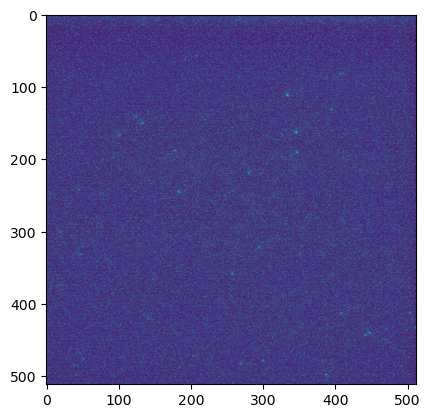

In [49]:
plt.imshow(background)

In [183]:
np.abs(videasy[0] / smoothed == result).sum() / smoothed.size

0.7681770324707031

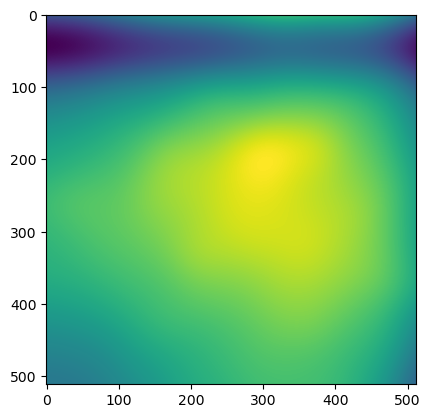

In [158]:
# cutborder = 100
# plt.imshow(load_dump("mean_pic")[0][cutborder:-cutborder, cutborder:-cutborder])
plt.imshow(load_dump("mean_pic")[0])

In [43]:
print(videasy[0].std())
print(vidhard[0].std())
load_dump("mean_pic")[0]

54.013245
111.941


array([54.01325], dtype=float32)

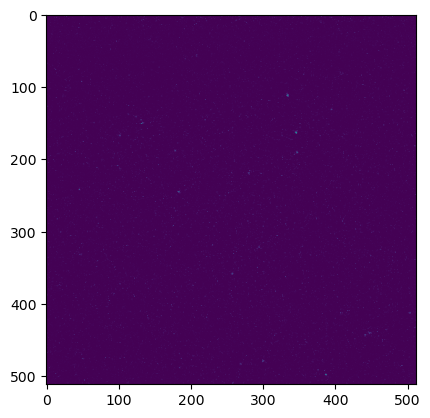

In [34]:
plt.imshow(load_dump("mean_pic")[0][0])

In [ ]:
videasy[0].std()

In [19]:
videasy[0].mean()

2111.0037

In [17]:
arr = load_dump("mean_pic")[0]

In [15]:
arr.sum() / videasy[0].sum()

0.9999999

In [6]:

print(vidhard[0].std())

54.013245
111.941


In [4]:
# blob_log_df = pd.DataFrame(blob_log(vid[0], min_sigma = 2, max_sigma = 8))
# blob_log_df["frame"] = 0
# blob_log_df.rename(columns = {0: "y", 1: "x", 2: "r"}, inplace = True)

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

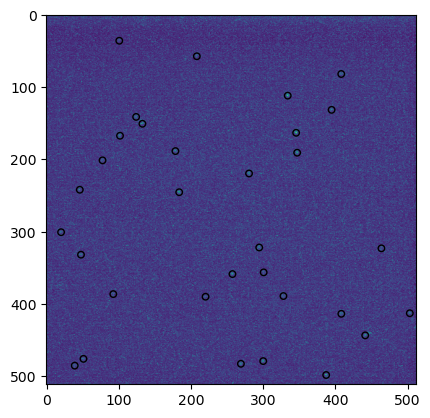

In [10]:
d = 9
track_df = gpu_tracking.batch(videasy, d, truncate_preprocessed = True, minmass = 800)
gpu_tracking.annotate_video(videasy, track_df, 0, r = d/2)

In [40]:
d = 9
track_df = gpu_tracking.batch(videasy, d, truncate_preprocessed = True, snr = 1., minmass_snr = 0.3)
# gpu_tracking.annotate_video(videasy, track_df, 0, r = d/2)

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

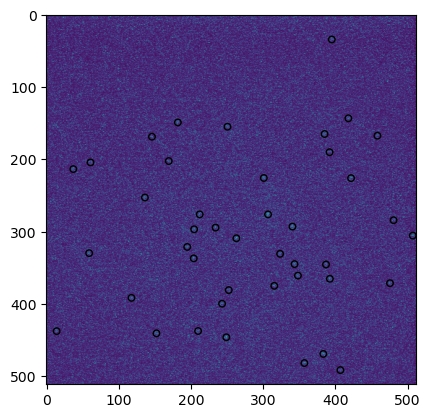

In [38]:
d = 9
track_df = gpu_tracking.batch(vidhard, d, truncate_preprocessed = True, snr = 1, minmass_snr = 0.3)
gpu_tracking.annotate_video(vidhard, track_df, 0, r = d/2)

In [57]:
track_df = gpu_tracking.LoG(videasy, 2.5, 3.5, overlap_threshold = 0, snr = 1.8, minmass_snr = 0.3)
# gpu_tracking.annotate_video(videasy, track_df, 0)

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

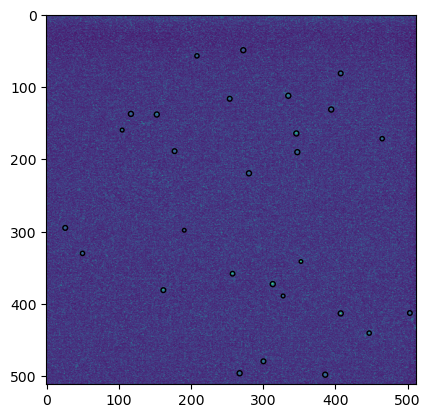

In [66]:
gpu_tracking.annotate_video(videasy, track_df, 8)

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

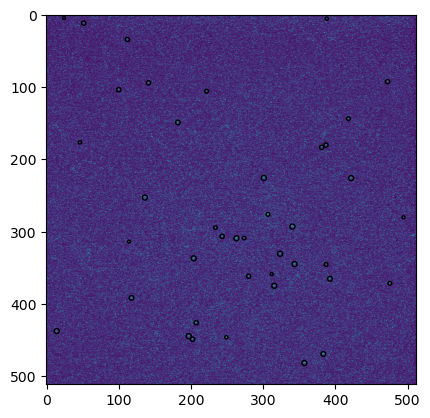

In [33]:
track_df = gpu_tracking.LoG(vidhard, 2, 3.5, n_radii = 15, overlap_threshold = 0, snr = 1.5, minmass_snr = 0.3)
gpu_tracking.annotate_video(vidhard, track_df, 0)

In [12]:
track_df.groupby("r").count() / len(track_df)

frame         y         x      mass  raw_mass  raw_bg_median  \
r                                                                           
1.400000  0.035593  0.035593  0.035593  0.035593  0.035593       0.035593   
1.577778  0.032203  0.032203  0.032203  0.032203  0.032203       0.032203   
1.755556  0.024576  0.024576  0.024576  0.024576  0.024576       0.024576   
1.933333  0.089831  0.089831  0.089831  0.089831  0.089831       0.089831   
2.111111  0.033051  0.033051  0.033051  0.033051  0.033051       0.033051   
2.288889  0.144068  0.144068  0.144068  0.144068  0.144068       0.144068   
2.466667  0.011864  0.011864  0.011864  0.011864  0.011864       0.011864   
2.644444  0.137288  0.137288  0.137288  0.137288  0.137288       0.137288   
2.822222  0.004237  0.004237  0.004237  0.004237  0.004237       0.004237   
3.000000  0.487288  0.487288  0.487288  0.487288  0.487288       0.487288   

          raw_mass_corrected  
r                             
1.400000            0.035593  
1.577778            0.032203  
1.755556            0.024576  
1.933333            0.089831  
2.111111            0.033051  
2.288889            0.144068  
2.466667            0.011864  
2.644444            0.137288  
2.822222            0.004237  
3.000000            0.487288

(<Figure size 640x480 with 1 Axes>, <AxesSubplot: >)

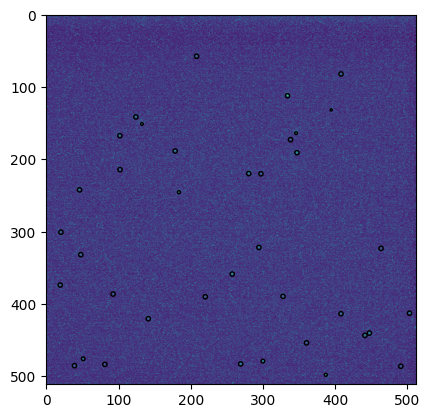

In [32]:
track_df.groupby("r").count() / len(track_df)

frame         y         x      mass  raw_mass  raw_bg_median  \
r                                                                           
1.000000  0.001489  0.001489  0.001489  0.001489  0.001489       0.001489   
1.777778  0.032013  0.032013  0.032013  0.032013  0.032013       0.032013   
2.555556  0.044834  0.044834  0.044834  0.044834  0.044834       0.044834   
3.333333  0.073703  0.073703  0.073703  0.073703  0.073703       0.073703   
4.111111  0.000744  0.000744  0.000744  0.000744  0.000744       0.000744   
4.888889  0.079659  0.079659  0.079659  0.079659  0.079659       0.079659   
5.666667  0.074531  0.074531  0.074531  0.074531  0.074531       0.074531   
6.444444  0.199107  0.199107  0.199107  0.199107  0.199107       0.199107   
7.222222  0.212259  0.212259  0.212259  0.212259  0.212259       0.212259   
8.000000  0.281661  0.281661  0.281661  0.281661  0.281661       0.281661   

          raw_mass_corrected  
r                             
1.000000            0.001489  
1.777778            0.032013  
2.555556            0.044834  
3.333333            0.073703  
4.111111            0.000744  
4.888889            0.079659  
5.666667            0.074531  
6.444444            0.199107  
7.222222            0.212259  
8.000000            0.281661

In [ ]:
gpu_tracking.batch_file()